# Rendszerterhelés, Import és Export adatok vizsgálata a hőmérséklet és az idő függvényében

In [208]:
%matplotlib inline
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from datetime import datetime 
import numpy as np

In [209]:
database = pd.read_csv('database_2017_03.csv')
# print(database)
print(database.mean())

export          644.384756
import         2133.773076
system_load    4733.257631
dtype: float64


In [210]:
def add(sum, additives, ntick):
    for i in range(0,len(additives)):
        if (math.isnan(additives[i])): 
            ntick -= 1
#             print(ntick)
            return [sum, ntick]
        else:
            sum[i] += additives[i]
    return [sum, ntick]


HEADER = ['date', 'avg_exp', 'avg_imp', 'avg_sysload']
database_means = pd.DataFrame(columns=HEADER)
row = pd.DataFrame(columns=HEADER)
sum = [0,0,0]
ntick = 24
sum[0] += database['export'].iloc[0]
sum[1] += database['import'].iloc[0]                
sum[2] += database['system_load'].iloc[0]

for tick in range(1,len(database)):
    if ((tick) % 24 != 0):
        [sum, ntick] = add(sum, [database['export'].iloc[tick], database['import'].iloc[tick],\
            database['system_load'].iloc[tick]], ntick)
    else:
        sum = [x/ntick for x in sum]
        df = pd.DataFrame(columns=HEADER)
        df.loc[0] = [x for x in [database['date'].iloc[tick-1], sum[0], sum[1], sum[2]]]
#         print(df)
        database_means = database_means.append(df, ignore_index=True)
        sum = [0 for x in sum]
        ntick = 24
        [sum, ntick] = add(sum, [database['export'].iloc[tick], database['import'].iloc[tick],\
                                 database['system_load'].iloc[tick]], ntick)

for i in range(0,len(database_means)):
    if (database_means['avg_sysload'].iloc[i]<3200):
        print([i, database_means.iloc[[i]]])
# print(database_means)
database.to_csv('database_with_means.csv', sep=',', index=False)

In [211]:
wheater = pd.read_csv('weather_info.csv')
data_with_wheater = database_means.set_index('date').join(wheater.set_index('date'))
print(data_with_wheater)

                 avg_exp      avg_imp  avg_sysload  max  min  rain  snow  \
date                                                                       
2016.01.01.  1448.416667  2203.333333  3937.083333   -3  -10     0   0.0   
2016.01.02.  1359.375000  2320.041667  4267.958333   -5   -8     0   0.5   
2016.01.03.  1356.041667  2426.625000  4329.041667   -4  -11     0   0.0   
2016.01.04.  1347.208333  2328.208333  5118.666667   -7  -12     4   5.1   
2016.01.05.  1294.375000  2451.750000  5288.500000   -4   -8     0   0.5   
2016.01.06.  1265.875000  2509.250000  5312.333333    0   -5     4   4.1   
2016.01.07.   853.041667  2123.458333  5222.833333    4   -6     0   0.0   
2016.01.08.   865.875000  2135.708333  5242.000000   -1   -7     0   0.0   
2016.01.09.   983.833333  2458.250000  4840.166667    1   -3    12   0.0   
2016.01.10.   948.958333  2353.041667  4516.875000    3    0    12   0.0   
2016.01.11.   815.458333  2125.666667  5067.166667    8    0    11   0.0   
2016.01.12. 

## Rendszerterhelés hőmérsékletfüggőségének vizsgálata

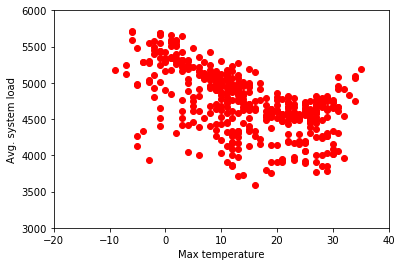

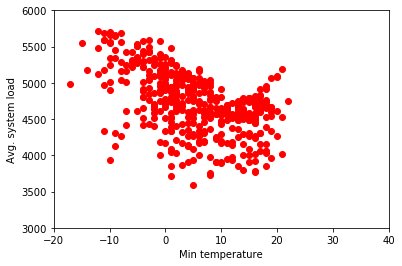

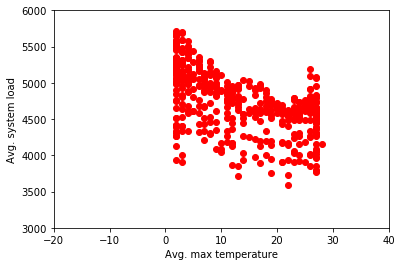

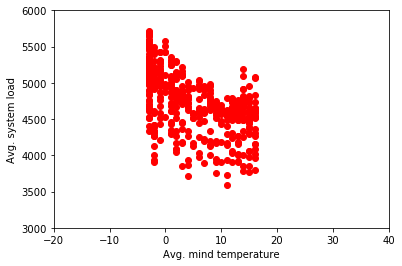

In [107]:
plt.plot(data_with_wheater['max'], data_with_wheater['avg_sysload'], 'ro')
plt.ylabel('Avg. system load')
plt.xlabel('Max temperature')
plt.axis([-20, 40, 3000, 6000])
plt.show()

plt.plot(data_with_wheater['min'], data_with_wheater['avg_sysload'], 'ro')
plt.ylabel('Avg. system load')
plt.xlabel('Min temperature')
plt.axis([-20, 40, 3000, 6000])
plt.show()

plt.plot(data_with_wheater['avg_max'], data_with_wheater['avg_sysload'], 'ro')
plt.ylabel('Avg. system load')
plt.xlabel('Avg. max temperature')
plt.axis([-20, 40, 3000, 6000])
plt.show()

plt.plot(data_with_wheater['avg_min'], data_with_wheater['avg_sysload'], 'ro')
plt.ylabel('Avg. system load')
plt.xlabel('Avg. mind temperature')
plt.axis([-20, 40, 3000, 6000])
plt.show()

## Export hőmérsékletfüggőségének vizsgálata

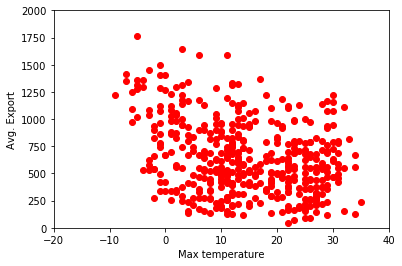

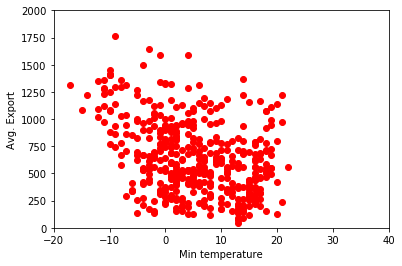

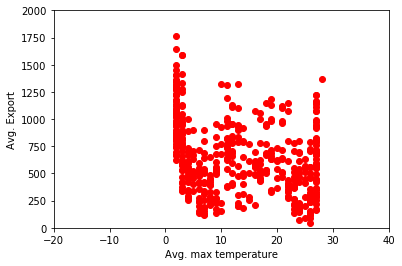

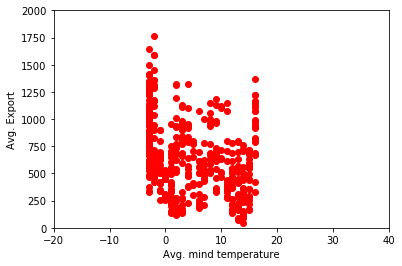

In [115]:
plt.plot(data_with_wheater['max'], data_with_wheater['avg_exp'], 'ro')
plt.ylabel('Avg. Export')
plt.xlabel('Max temperature')
plt.axis([-20, 40, 0, 2000])
plt.show()

plt.plot(data_with_wheater['min'], data_with_wheater['avg_exp'], 'ro')
plt.ylabel('Avg. Export')
plt.xlabel('Min temperature')
plt.axis([-20, 40, 0, 2000])
plt.show()

plt.plot(data_with_wheater['avg_max'], data_with_wheater['avg_exp'], 'ro')
plt.ylabel('Avg. Export')
plt.xlabel('Avg. max temperature')
plt.axis([-20, 40, 0, 2000])
plt.show()

plt.plot(data_with_wheater['avg_min'], data_with_wheater['avg_exp'], 'ro')
plt.ylabel('Avg. Export')
plt.xlabel('Avg. mind temperature')
plt.axis([-20, 40, 0, 2000])
plt.show()

## Import hőmérsékletfüggőségének viszgálata

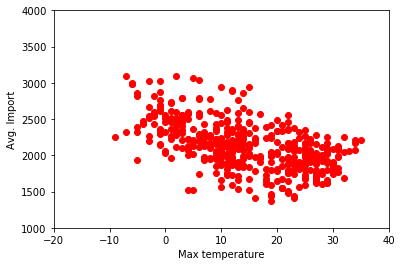

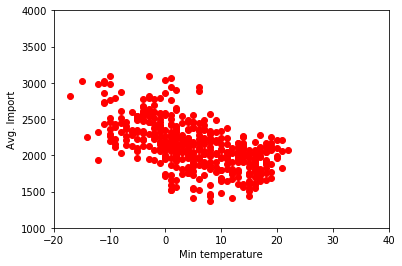

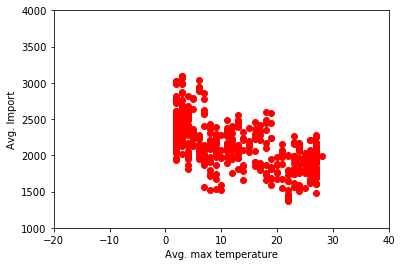

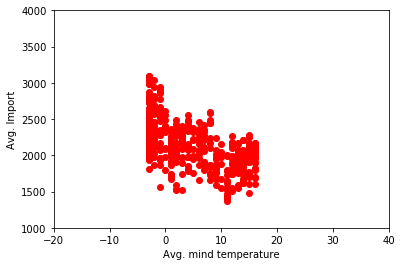

In [117]:
plt.plot(data_with_wheater['max'], data_with_wheater['avg_imp'], 'ro')
plt.ylabel('Avg. Import')
plt.xlabel('Max temperature')
plt.axis([-20, 40, 1000, 4000])
plt.show()

plt.plot(data_with_wheater['min'], data_with_wheater['avg_imp'], 'ro')
plt.ylabel('Avg. Import')
plt.xlabel('Min temperature')
plt.axis([-20, 40, 1000, 4000])
plt.show()

plt.plot(data_with_wheater['avg_max'], data_with_wheater['avg_imp'], 'ro')
plt.ylabel('Avg. Import')
plt.xlabel('Avg. max temperature')
plt.axis([-20, 40, 1000, 4000])
plt.show()

plt.plot(data_with_wheater['avg_min'], data_with_wheater['avg_imp'], 'ro')
plt.ylabel('Avg. Import')
plt.xlabel('Avg. mind temperature')
plt.axis([-20, 40, 1000, 4000])
plt.show()

## Rendszerterhelés, Import és Export adatok vizsgálata az időszak tekintetében

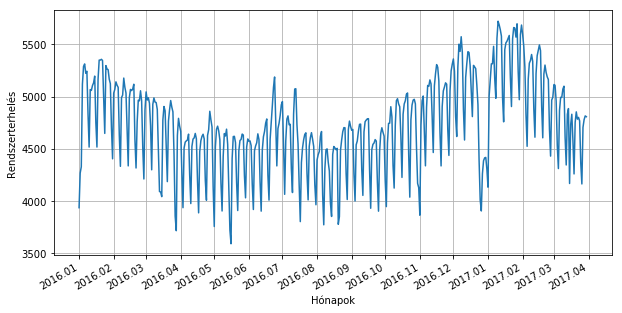

In [221]:
date1 = datetime.date(datetime.strptime(data_with_wheater.index.values[0], dateformat))
date2 = datetime.strptime(data_with_wheater.index.values[len(data_with_wheater)-1], dateformat)

years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y.%m')

dates = data_with_wheater.index.values
opens = data_with_wheater['avg_sysload']

fig, ax = plt.subplots()
ax.plot_date(dates, opens, '-')
pylab.rcParams['figure.figsize'] = (10, 7)

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.ylabel('Rendszerterhelés')
plt.xlabel('Hónapok')

ax.fmt_xdata = DateFormatter('%Y.%m.%d')
ax.grid(True)

fig.autofmt_xdate()
plt.show()